# Crime Pattern Detection – Exploratory Data Analysis

## Project Description
This project focuses on analyzing crime data related to property stolen and recovered.
The objective is to understand crime patterns, identify high-crime areas, analyze trends,
and visualize insights using graphs and statistics.

This is a pure data analysis project created for academic and NTCC viva purposes.
No prediction or machine learning model is applied at this stage.


In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("default")


In [9]:
# Load the dataset
df = pd.read_csv("data/crime_property_data.csv")

# Show first 5 rows
df.head()


,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937


In [3]:
# Dataset shape
df.shape


(2449, 8)

In [4]:
# Column names
df.columns


Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [5]:
# Data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Name                    2449 non-null   object
 1   Year                         2449 non-null   int64 
 2   Group_Name                   2449 non-null   object
 3   Sub_Group_Name               2449 non-null   object
 4   Cases_Property_Recovered     2449 non-null   int64 
 5   Cases_Property_Stolen        2449 non-null   int64 
 6   Value_of_Property_Recovered  2449 non-null   int64 
 7   Value_of_Property_Stolen     2449 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 153.2+ KB


In [6]:
# Statistical summary of numerical columns
df.describe()


,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
count,2449.000000,2449.000000,2449.000000,2.449000e+03,2.449000e+03
mean,2005.499388,1232.892201,3419.420988,5.859924e+07,2.465431e+08
std,2.873294,3079.573907,8136.256820,2.494403e+08,9.670035e+08
min,2001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2003.000000,13.000000,45.000000,6.845700e+05,3.649018e+06
50%,2005.000000,113.000000,358.000000,5.851830e+06,2.701800e+07
75%,2008.000000,722.000000,1875.000000,3.406395e+07,1.214580e+08
max,2010.000000,27960.000000,80663.000000,7.470011e+09,2.377625e+10


In [7]:
# Check missing values
df.isnull().sum()


Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [8]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['area_name', 'year', 'group_name', 'sub_group_name',
       'cases_property_recovered', 'cases_property_stolen',
       'value_of_property_recovered', 'value_of_property_stolen'],
      dtype='object')

## Dataset Understanding

The dataset contains records related to property crimes.
Each row represents crime statistics for a particular region and year.
The data includes information about property stolen, recovered,
and crime distribution across areas.


In [10]:
df.columns


Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [12]:
top_areas = df['Area_Name'].value_counts().head(10)
top_areas


Area_Name
Andaman & Nicobar Islands    70
Puducherry                   70
Maharashtra                  70
Manipur                      70
Meghalaya                    70
Mizoram                      70
Nagaland                     70
Odisha                       70
Punjab                       70
Andhra Pradesh               70
Name: count, dtype: int64

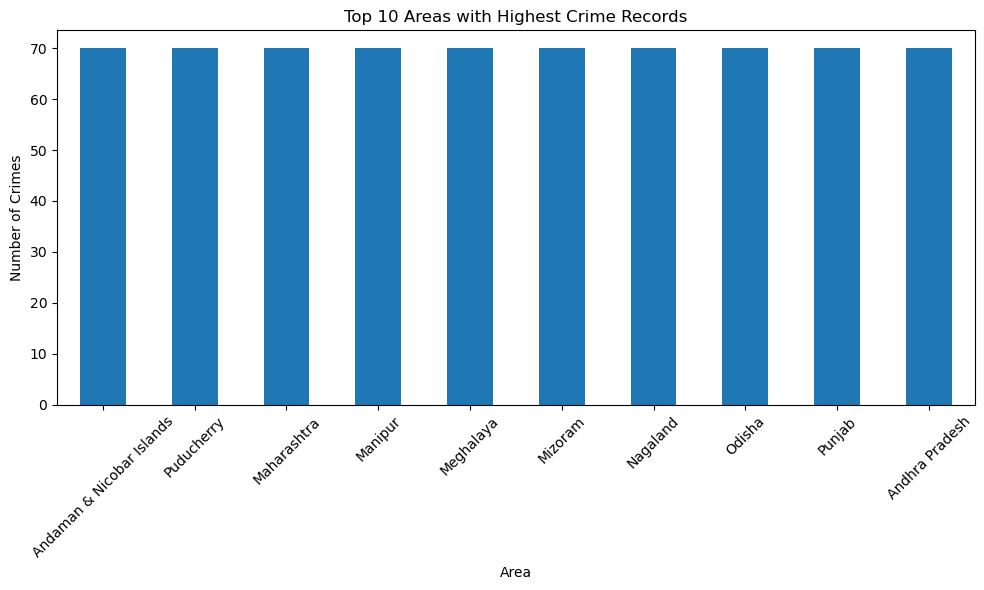

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_areas.plot(kind='bar')
plt.title('Top 10 Areas with Highest Crime Records')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
top_crime_groups = df['Group_Name'].value_counts()
top_crime_groups


Group_Name
Burglary - Property                    350
Criminal Breach of Trust - Property    350
Dacoity -Property                      350
Other heads of Property                350
Robbery - Property                     350
Theft - Property                       350
Total Property                         349
Name: count, dtype: int64

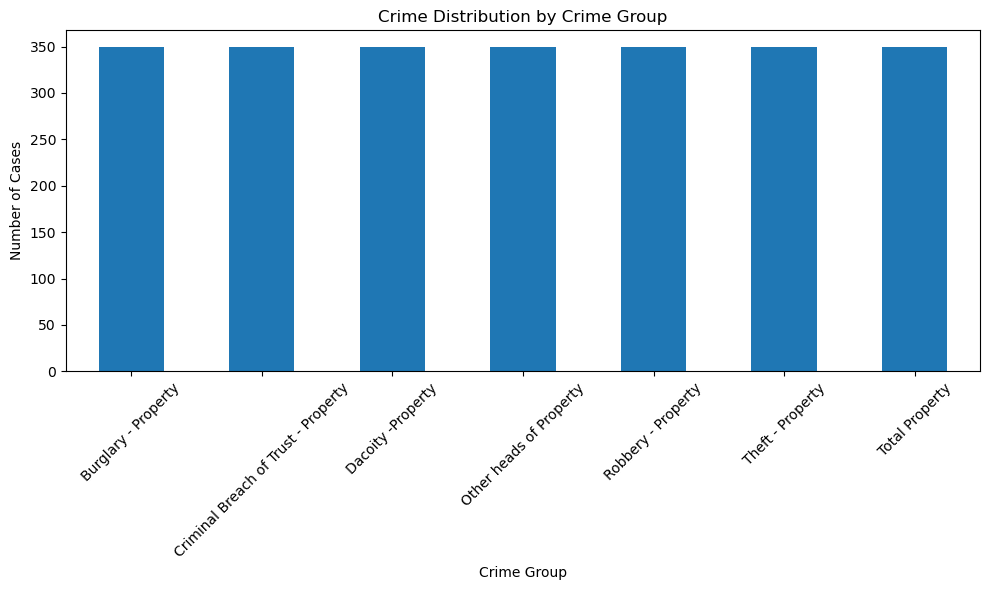

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_crime_groups.plot(kind='bar')
plt.title('Crime Distribution by Crime Group')
plt.xlabel('Crime Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
top_sub_crimes = df['Sub_Group_Name'].value_counts().head(10)
top_sub_crimes


Sub_Group_Name
3. Burglary                             350
5. Criminal Breach of Trust             350
1. Dacoity                              350
6. Other Property                       350
2. Robbery                              350
4. Theft                                350
7. Total Property Stolen & Recovered    349
Name: count, dtype: int64

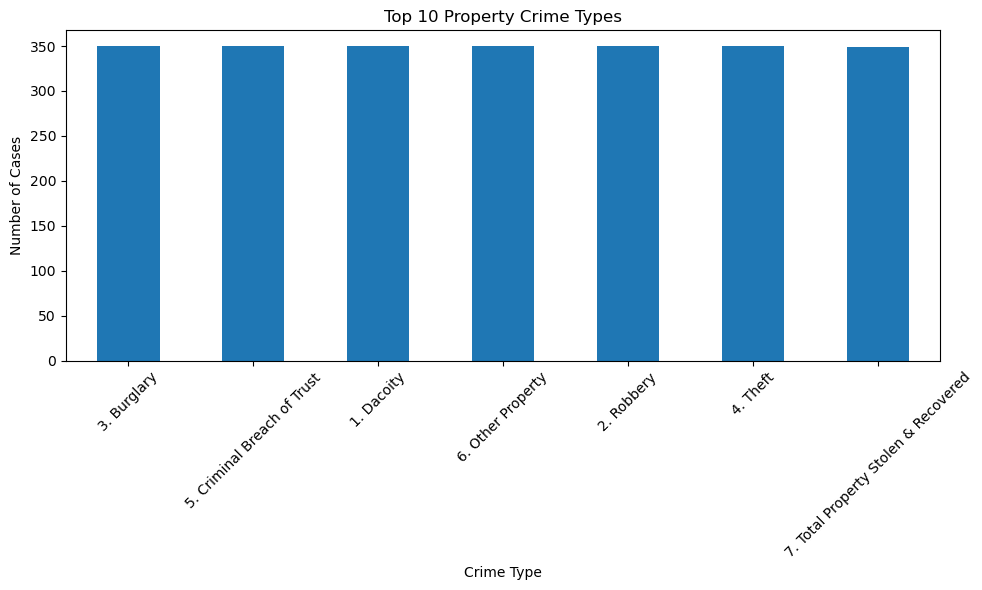

In [17]:
plt.figure(figsize=(10,6))
top_sub_crimes.plot(kind='bar')
plt.title('Top 10 Property Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
df['Year'].unique()


array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [19]:
yearly_crime = df.groupby('Year')['Cases_Property_Stolen'].sum()
yearly_crime


Year
2001    790836
2002    774302
2003    755556
2004    812392
2005    799578
2006    813294
2007    857074
2008    912990
2009    911884
2010    946256
Name: Cases_Property_Stolen, dtype: int64

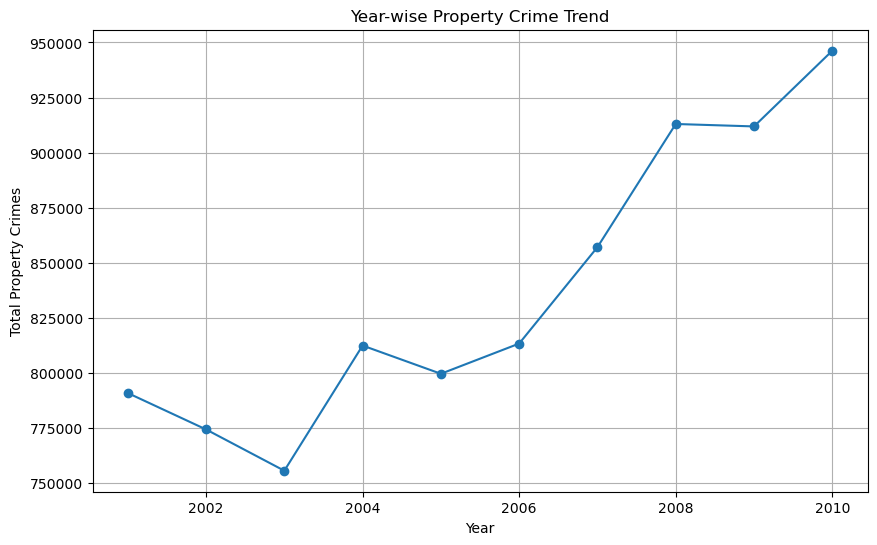

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(yearly_crime.index, yearly_crime.values, marker='o')
plt.title('Year-wise Property Crime Trend')
plt.xlabel('Year')
plt.ylabel('Total Property Crimes')
plt.grid(True)
plt.show()


## Property Stolen vs Property Recovered Analysis

This section compares the total number of property theft cases with the number of cases in which property was successfully recovered.  
The analysis helps in understanding the effectiveness of crime recovery efforts and highlights the recovery gap in property-related crimes.


In [21]:
total_stolen = df['Cases_Property_Stolen'].sum()
total_recovered = df['Cases_Property_Recovered'].sum()

total_stolen, total_recovered


(np.int64(8374162), np.int64(3019353))

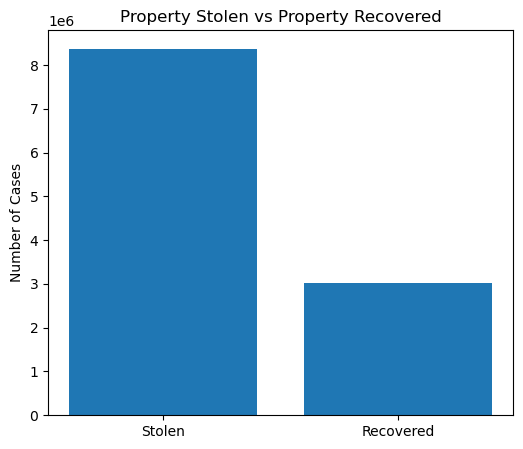

In [22]:
plt.figure(figsize=(6,5))
plt.bar(['Stolen', 'Recovered'], [total_stolen, total_recovered])
plt.title('Property Stolen vs Property Recovered')
plt.ylabel('Number of Cases')
plt.show()


## Top Crime Affected Areas

This analysis identifies the areas with the highest number of property crime cases.  
Understanding high-crime areas helps in recognizing regional crime patterns and supports data-driven decision making for law enforcement.


In [23]:
# Group by Area and calculate total property stolen
area_crime = df.groupby('Area_Name')['Cases_Property_Stolen'].sum().sort_values(ascending=False)

# Display top 10 crime-affected areas
area_crime.head(10)


Area_Name
Maharashtra       1376814
Madhya Pradesh     733524
Andhra Pradesh     642822
Uttar Pradesh      559970
Gujarat            534060
Karnataka          494968
Delhi              490694
Rajasthan          469468
Tamil Nadu         431864
Bihar              411840
Name: Cases_Property_Stolen, dtype: int64

<Axes: title={'center': 'Top 10 Crime Affected Areas'}, xlabel='Area_Name'>

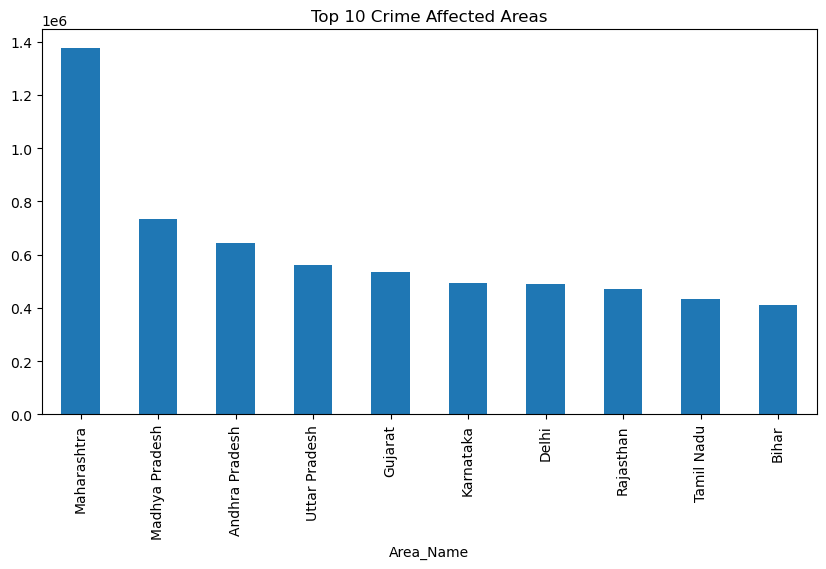

In [24]:
area_crime.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Crime Affected Areas')


## Step 9: Year-wise Crime Trend Analysis

This section analyzes how property crime cases have changed over the years.
It helps in understanding whether crime is increasing, decreasing, or remaining stable.


In [25]:
# Group data by Year and sum property stolen cases
yearly_crime = (
    df.groupby('Year')['Cases_Property_Stolen']
    .sum()
    .sort_index()
)

# Display year-wise crime data
yearly_crime


Year
2001    790836
2002    774302
2003    755556
2004    812392
2005    799578
2006    813294
2007    857074
2008    912990
2009    911884
2010    946256
Name: Cases_Property_Stolen, dtype: int64

<Axes: title={'center': 'Year-wise Property Crime Trend'}, xlabel='Year'>

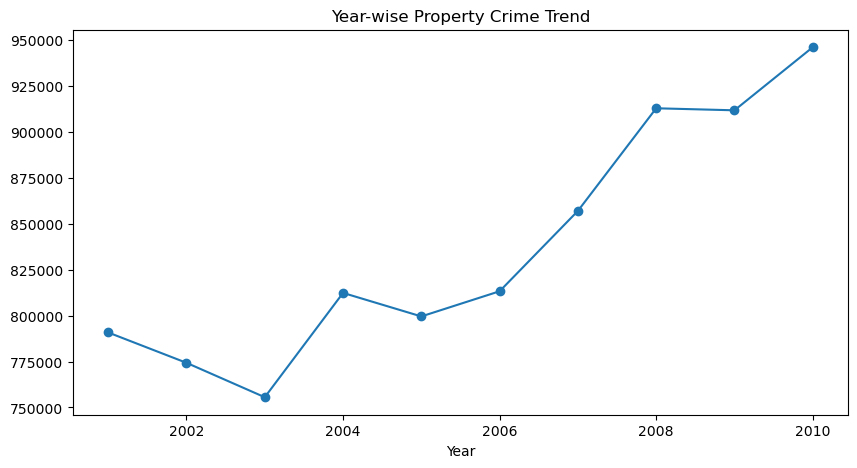

In [26]:
yearly_crime.plot(
    kind='line',
    marker='o',
    figsize=(10,5),
    title='Year-wise Property Crime Trend'
)


## Step 10: Top Crime Areas Analysis

This section identifies the top areas with the highest number of property crime cases.
It helps in understanding which regions require more focused crime prevention measures.


In [30]:
# Group by Area_Name (State/UT equivalent) and sum property stolen cases
state_crime = (
    df.groupby('Area_Name')['Cases_Property_Stolen']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Display top 10 crime-prone states/areas
state_crime


Area_Name
Maharashtra       1376814
Madhya Pradesh     733524
Andhra Pradesh     642822
Uttar Pradesh      559970
Gujarat            534060
Karnataka          494968
Delhi              490694
Rajasthan          469468
Tamil Nadu         431864
Bihar              411840
Name: Cases_Property_Stolen, dtype: int64